In [1]:
using NLsolve
using Plots
using BenchmarkTools
configFile = "config.toml"
include("src/LadderDGA.jl")

[ Info: Reading Fortran Input, this can take several minutes.
[ Info: Done Reading Gamma
[ Info: Done Reading chi


Writing HDF5 (vars.jdl) and Fortran (fortran_out/) output.


┌ Info: loading from 
└   env.inputVars = "vars.jld"
┌ Warning: TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
└ @ Main ~/Hamburg/LadderDGA/src/helpers.jl:174
┌ Info: Inputs Read. Starting Computation.
│ Found usable intervals for local susceptibility of length 
│       sp: 11
│       ch: 9 
└       χLoc_sp = 0.3698, χLoc_ch = 0.0165
[ Info: Setting up and calculating k Grid: 


calculate_Σ_ladder (generic function with 1 method)

In [2]:
bubble, χsp, χsp_λ, χch, usable_sp, usable_ch, trilexsp, trilexch, 
           Σ_ladder_cut, Σ_ladder_cut_corrected, Σ_ladderLoc_cut = calculate_Σ_ladder(configFile, GLoc_fft)

[ Info: Reading Inputs...
[ Info: Calculating bubble: 


  0.612990 seconds (1.04 M allocations: 133.287 MiB, 9.59% gc time)
  0.166213 seconds (291.81 k allocations: 14.216 MiB)


[ Info: Calculating χ and γ: 


203.178034 seconds (1.39 M allocations: 1.672 GiB, 0.09% gc time)


[ Info: TODO: computation of local quantities does not make any sense


  3.193395 seconds (195.29 k allocations: 39.049 MiB, 0.32% gc time)


┌ Info: Found usable intervals for non-local susceptibility of length 
│ sp: 26:36, length: 11
│ ch: 27:35, length: 9
└ usable: 27:35, length: 9
┌ Info: Using rhs for non tail corrected lambda correction: 
│   rhs = 0.3707200196449585
│    =  = " = "
│   χLocch = 0.0164936206442667 + 2.757268708510092e-26im
│    +  = " + "
│   χLocsp = 0.36979824957558627 - 1.1718392011167892e-25im
│    -  = " - "
└   χch_sum = 0.015571850574894462 - 5.514537417020184e-26im
[ Info: Calculating λ correction in the spin channel: 


TODO: lambda tc


┌ Info: found 
│   χ_min = 0.09534722249428645
│   . Looking for roots in intervall  = ". Looking for roots in intervall "
│   int =
│    2-element Array{Float64,1}:
│     0.09434722249428645
└     0.19534722249428646
┌ Info: possible roots: 
│   r =
│    2-element Array{Root{Interval{Float64}},1}:
│     Root([0.095347, 0.0953472], :unknown)
└     Root([0.096757, 0.0967571], :unique)


  4.847836 seconds (8.13 M allocations: 391.130 MiB, 3.24% gc time)


┌ Info: Found λsp 
└   λsp = 0.09675706412746195
┌ Info: computing λ corrected χsp, using 
│   simParams.χFillType = lambda_χ_fill::ChiFillType = 1
└    as fill value outside usable ω range. = " as fill value outside usable ω range."


DEBUG: computing 2 versions of Sigma


[ Info: Calculating Σ ladder: 


  1.502675 seconds (2.67 M allocations: 132.313 MiB, 2.08% gc time)
  1.696111 seconds (4.12 M allocations: 278.962 MiB, 7.11% gc time)


(Complex{Float64}[0.04585549176258429 - 5.99049549253474e-17im 0.045857718520111064 - 5.991137787287439e-17im … 0.045923385489324765 - 6.015579406764724e-17im 0.04592562339882516 - 6.016555061182882e-17im; 0.04662251713676934 - 6.094516544059418e-17im 0.04662481895900227 - 6.095133264792702e-17im … 0.04669270241762198 - 6.120255207656335e-17im 0.04669501596113718 - 6.121290859984015e-17im; … ; 0.7327664937718749 - 1.0929552505364736e-14im 0.7333025024553497 - 1.0944680148043594e-14im … 0.7496780944616007 - 1.1439519226390155e-14im 0.7502564950161255 - 1.1457998834582012e-14im; 0.9042419085149818 - 1.9182055763914687e-14im 0.9050390990601982 - 1.9215030777127326e-14im … 0.9295802372444306 - 2.0241551244963982e-14im 0.9304538514205943 - 2.0279714169497343e-14im]

Complex{Float64}[0.048176772393099324 - 6.074147254418651e-17im 0.048179230039342776 - 6.074764143208458e-17im … 0.04825171505706857 - 6.088801292329974e-17im 0.04825418563588876 - 6.089156823108976e-17im; 0.048996257249279786 -

# Test for SC cycle in EoM

In [194]:
include("src/GFTools.jl")
G0_full = G_from_Σ(zeros(Complex{Float64}, length(fft_range)), ϵkGrid, fft_range, modelParams);
G0_fft = Gfft_from_Σ(zeros(Complex{Float64}, length(fft_range)), ϵkGrid, fft_range, modelParams);
G0 = flatten_2D(reduce_kGrid.(cut_mirror.(G0_full)))

t1 = Gfft_from_Σ(Σ_loc, ϵkGrid, fft_range, modelParams)
println(size(t1))
ttt = extend_Σ(Σ_λ_cut_corrected, Σ_loc, 0:length(Σ_loc)-1);
println(size(ttt))
ttt = mapslices(x -> expand_kGrid(qIndices, x)[:], ttt, dims=[2])
println(size(ttt))
t2 = Gfft_from_Σ(ttt, ϵkGrid, fft_range, modelParams)
t2_2 = G_from_Σ(ttt, ϵkGrid, fft_range, modelParams)
println("aa", size(t2))
t3 = flatten_2D(map(x-> fft(x)[:], t2_2))
t4 = flatten_2D(t2_2)
println(size(t3))
println(size(GLoc_fft))


(91, 1000)
(91, 56)
(91, 1000)
aa(91, 1000)
(91, 1000)
(91, 1000)


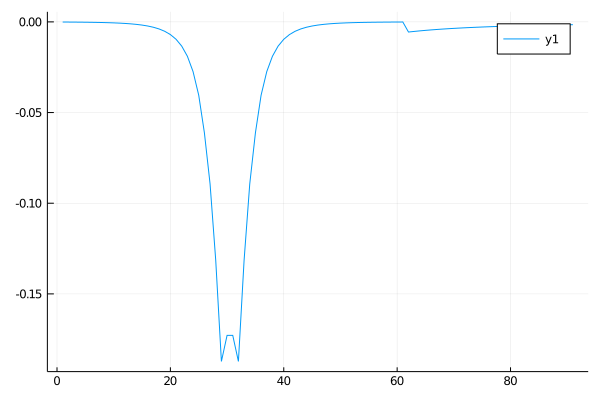

In [190]:
plot(real.(t4[:,1]))

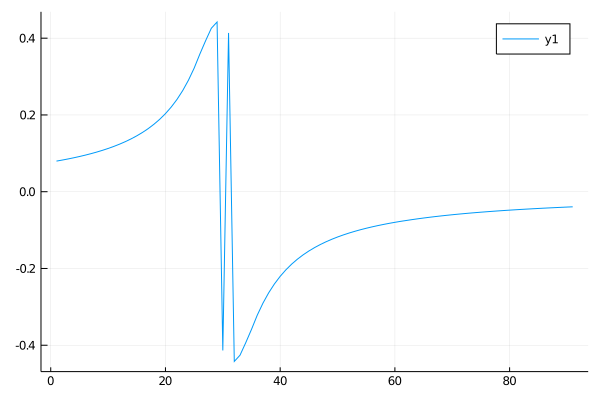

In [191]:
plot(imag.(t4[:,1]))

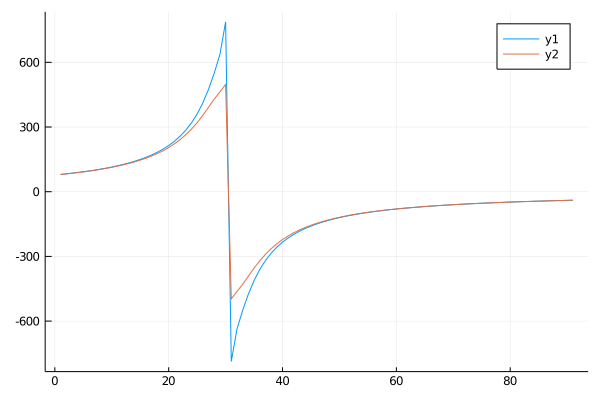

In [182]:
plot(imag.(GLoc_fft[:,1]) )
plot!(imag.(t2[:,1]))

In [152]:
imag.(1 ./ (1im .* fft_range))

NaN

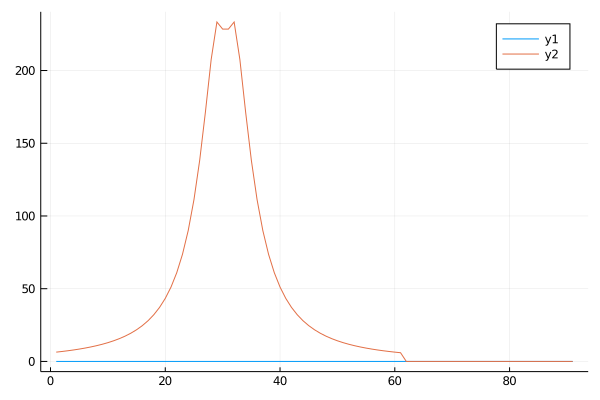

In [181]:
plot(real.(GLoc_fft[:,1]) )
plot!(real.(t2[:,1]) ./ 1)

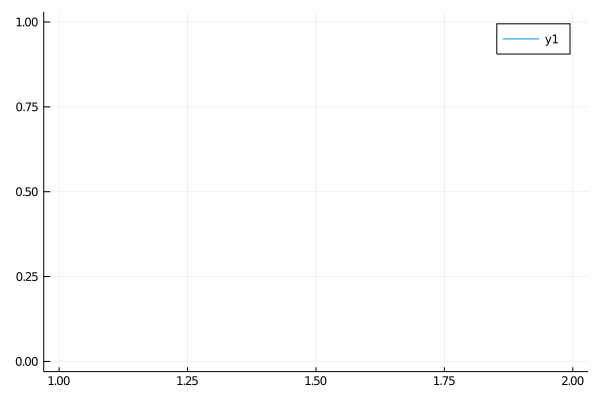

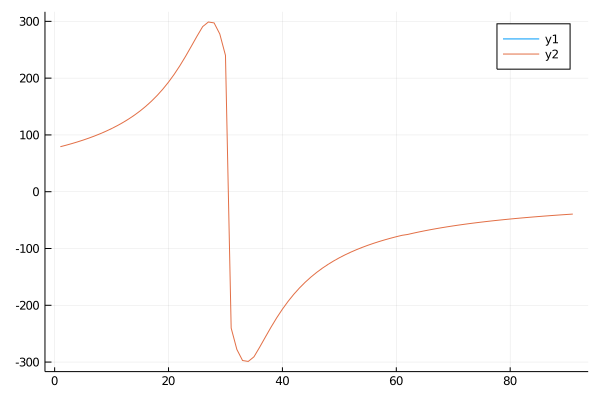

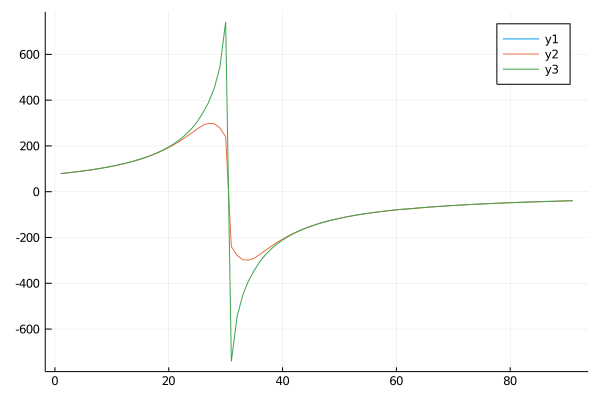

res: 12773.749289358351
res: 

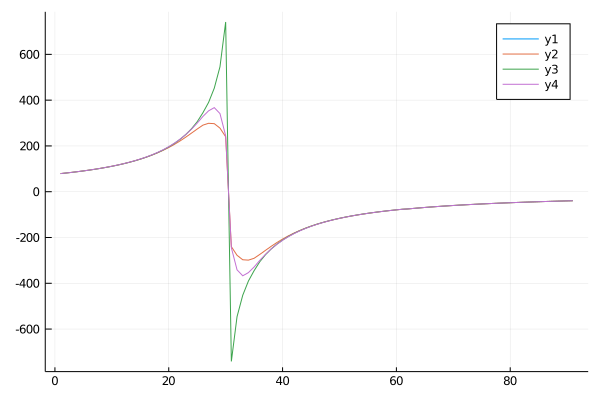

12951.493101762291


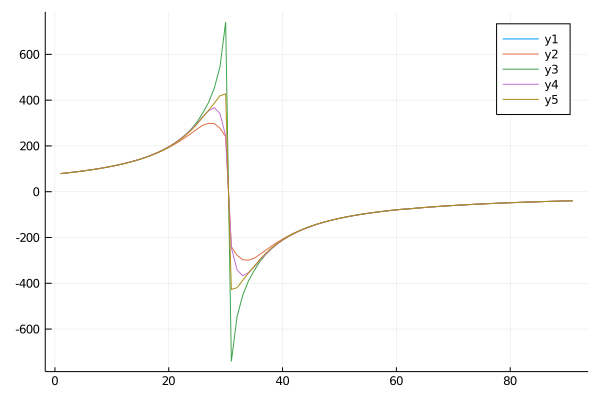

res: 11906.649712879478
res: 

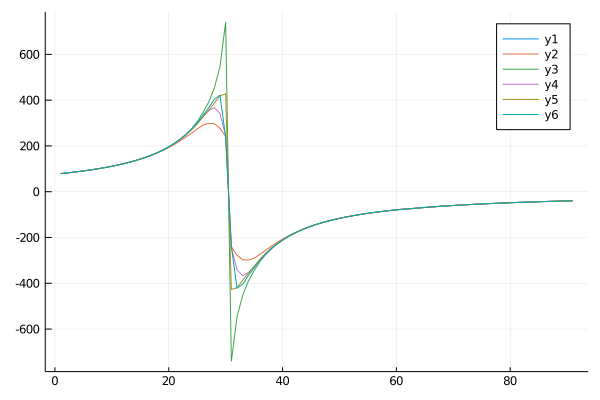

8798.439406600366


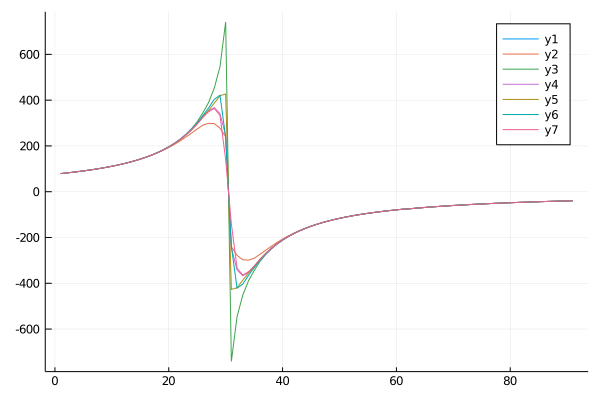

res: 9912.924219531282
res: 

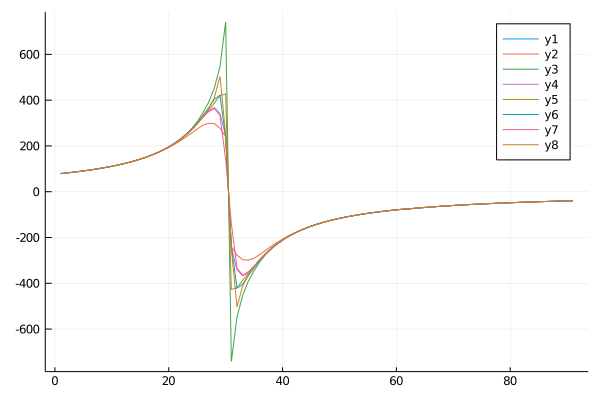

5617.787446711692


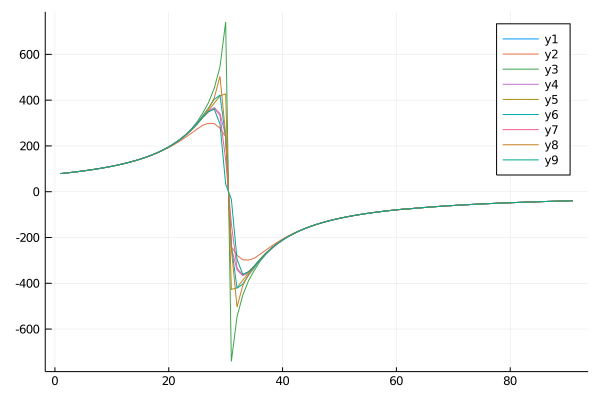

res: 7775.705703600742
res: 

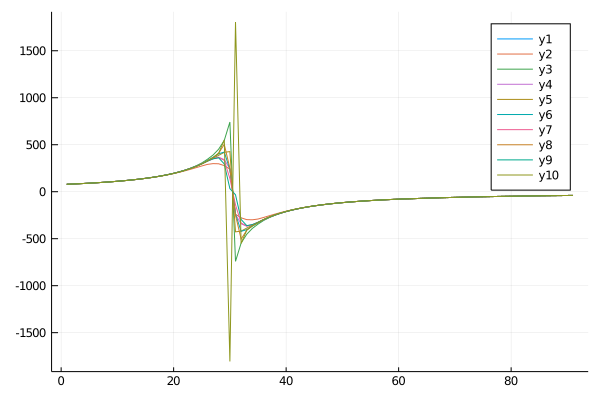

7379.300971984096


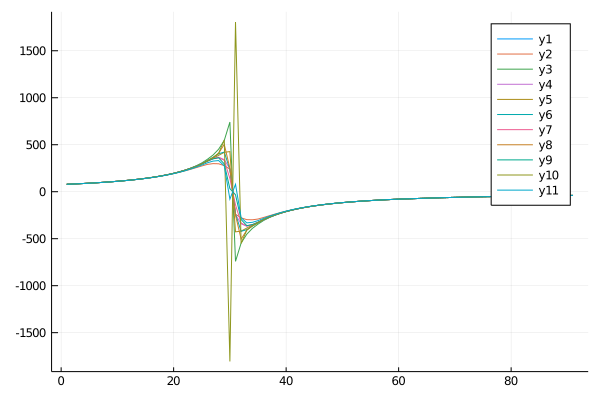

res: 116252.47077958674
res: 

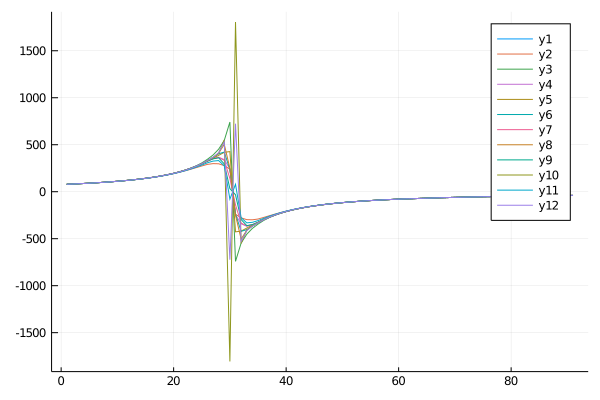

116019.61851419072


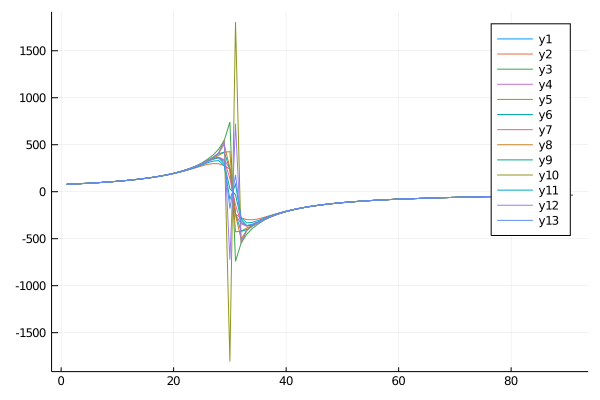

res: 12938.413462336212
res: 

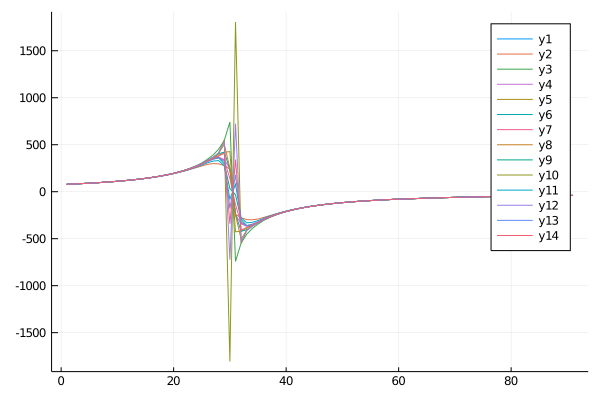

12795.71431754462


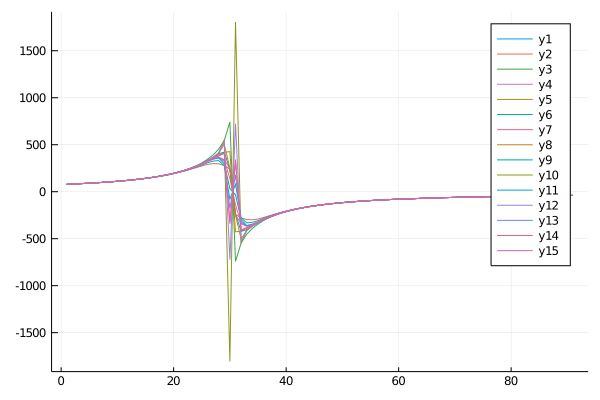

res: 5243.021178148099
res: 

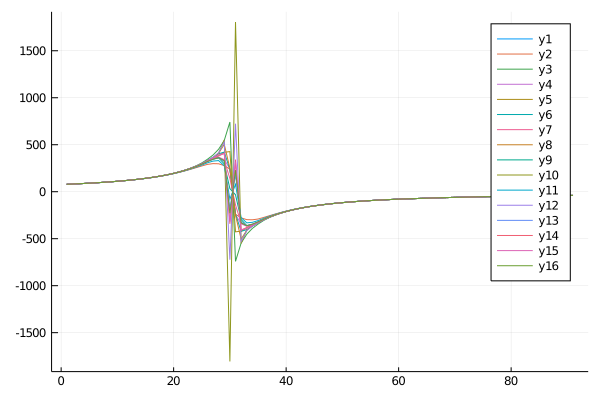

5934.3521630501145


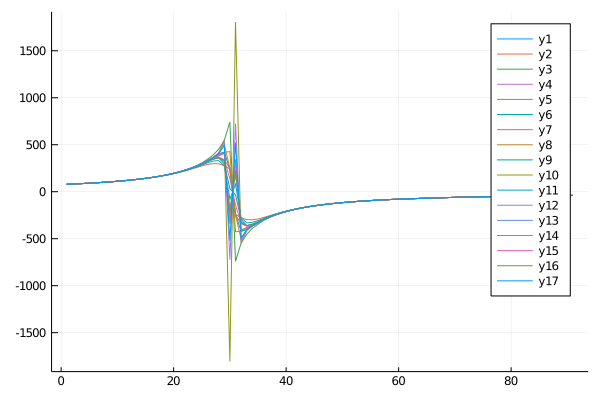

res: 4348.290164357954
res: 

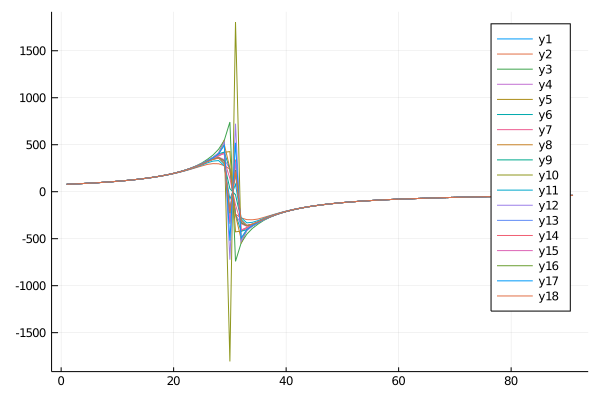

5601.829259618871


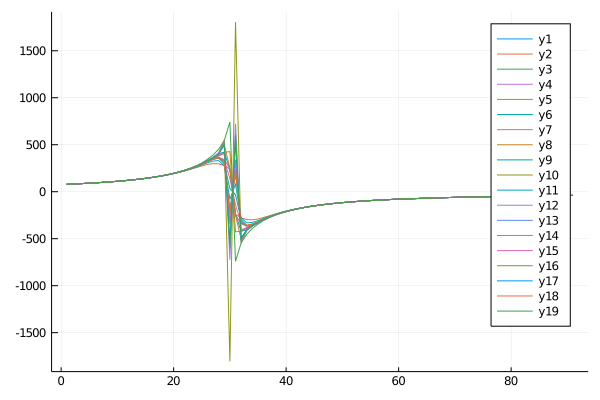

res: 4904.806155802373
res: 

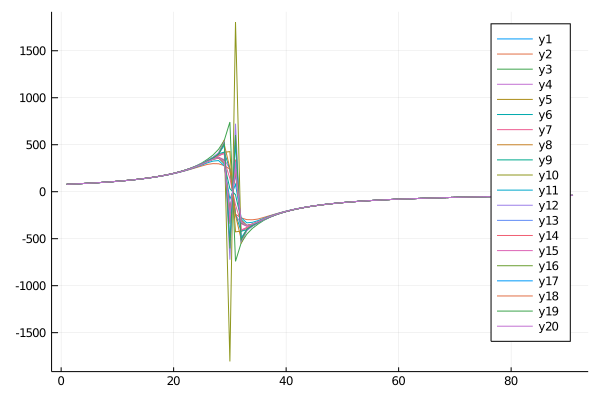

5199.369698561177


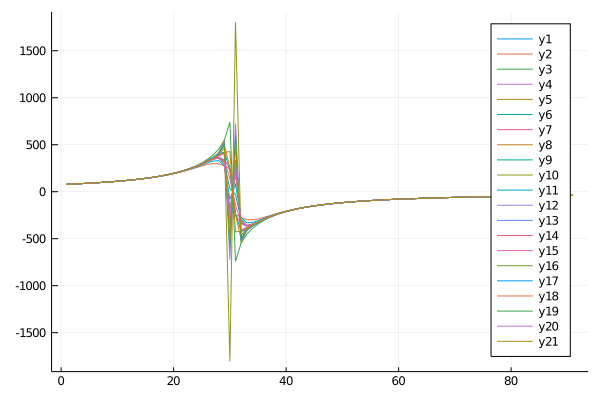

res: 4557.151327024763
res: 

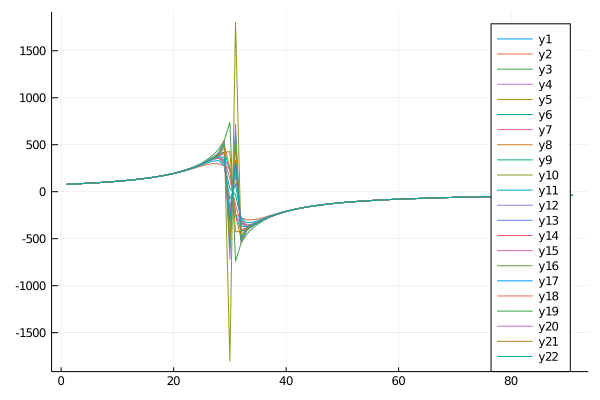

3433.9841082994108


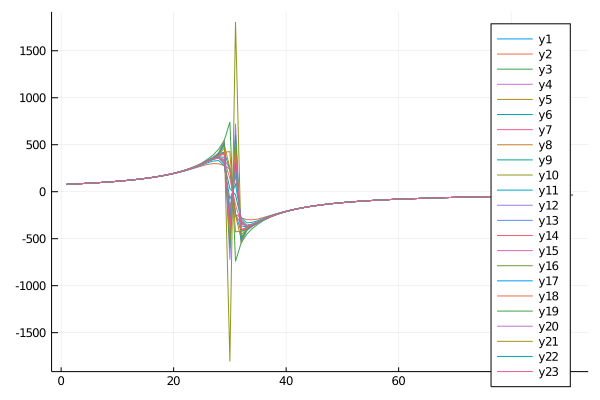

res: 3240.06588717078
res: 

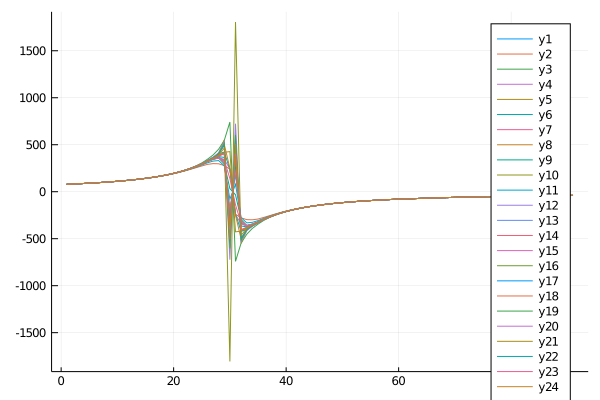

2475.403976420311


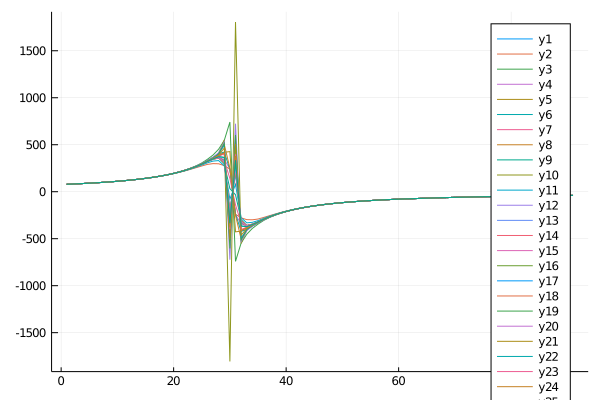

res: 2702.5949142136183
res: 

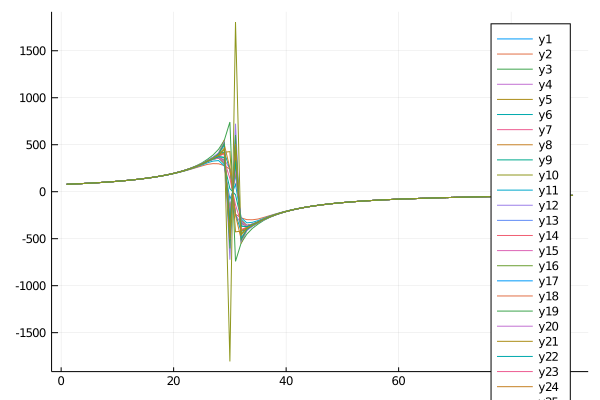

2349.9077729740247


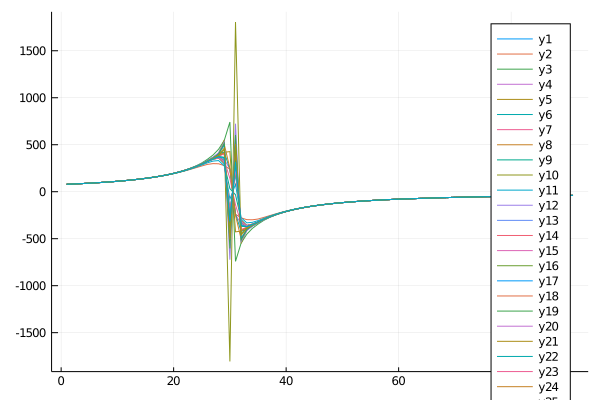

res: 2503.8464930718833
res: 

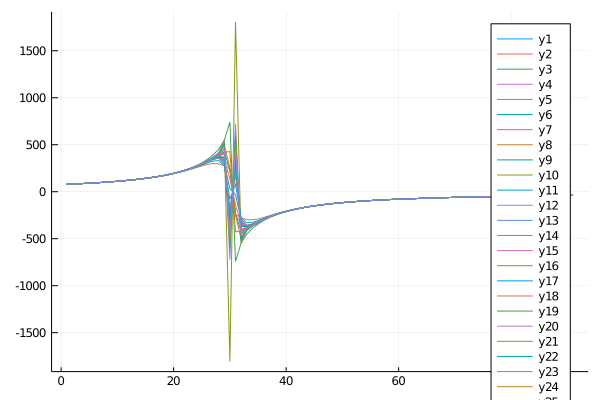

2195.1377416364035


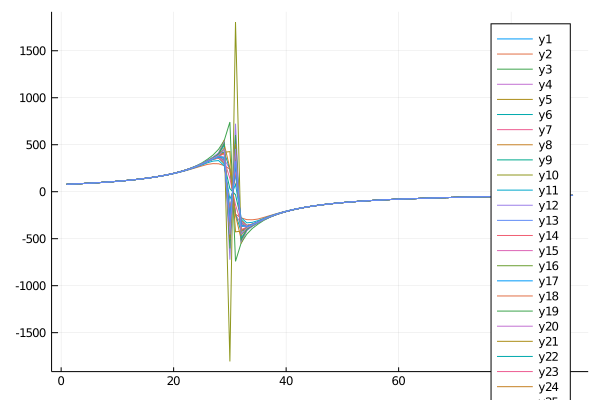

res: 2027.5070022930722
res: 

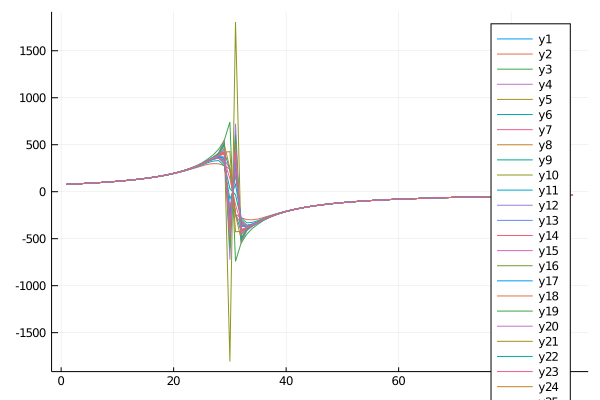

1722.9859069068473


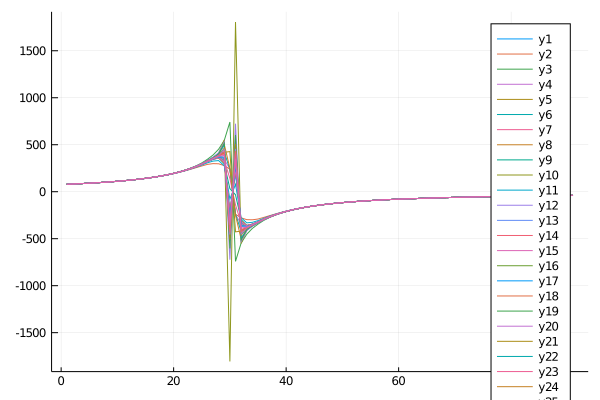

res: 1392.3120053438065
res: 

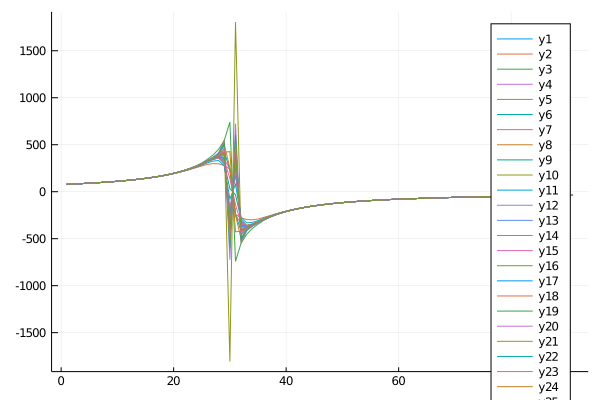

1238.357789949608


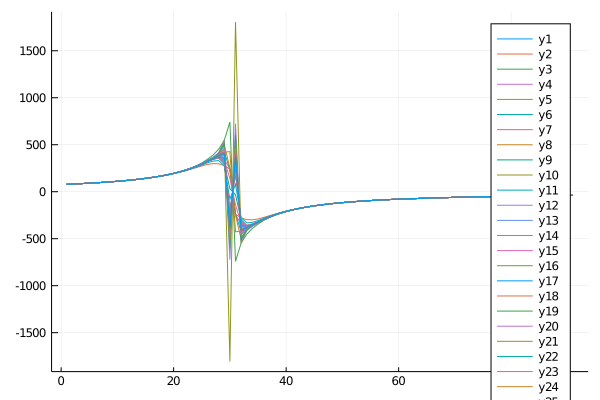

res: 1056.1637557779113
res: 

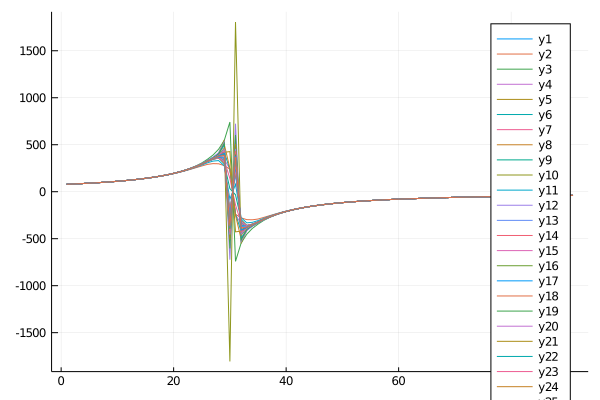

1076.3808353651884


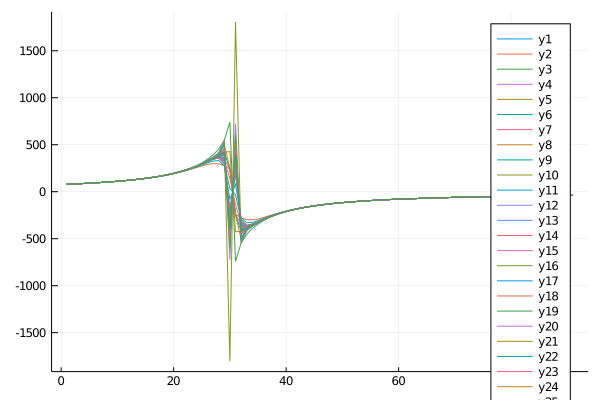

res: 1006.9891899934868
res: 

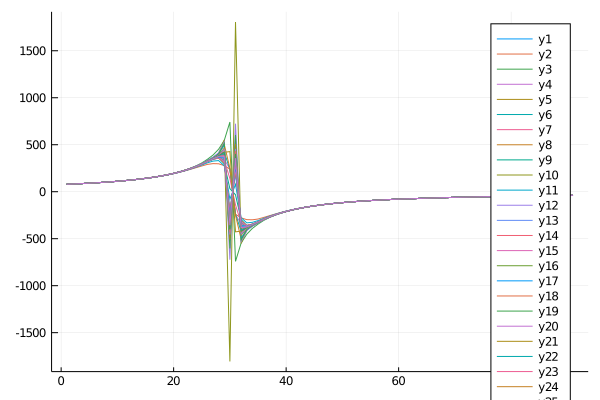

1009.6773674161134


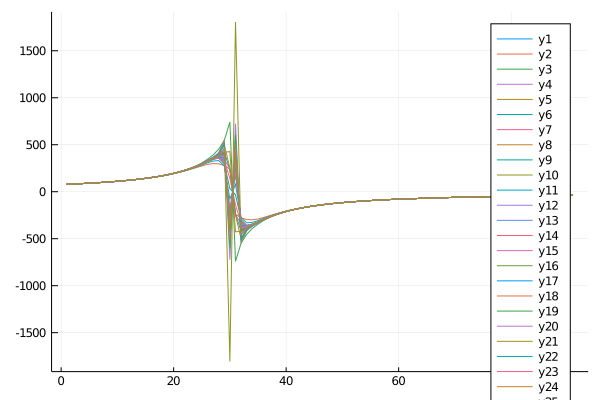

res: 910.5548748127969
res: 

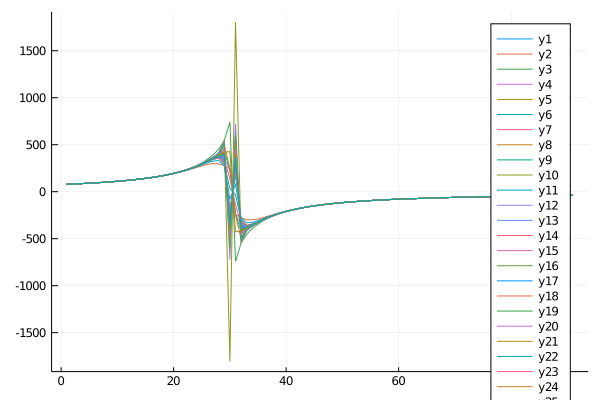

818.8690088444164


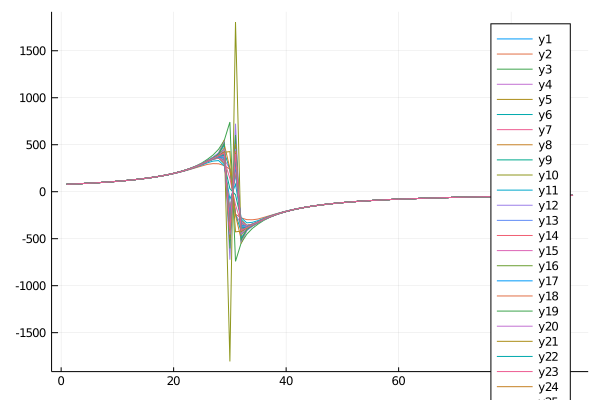

res: 694.691662849152
res: 

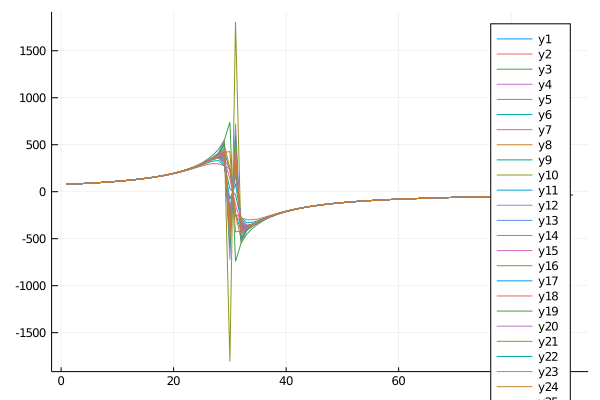

572.3185667559466


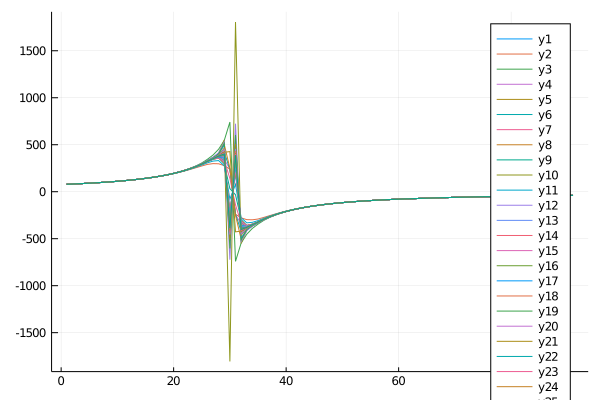

res: 492.6863583578697
res: 

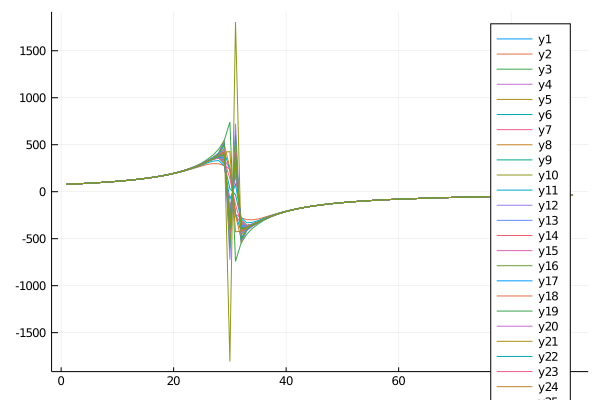

432.007620312593


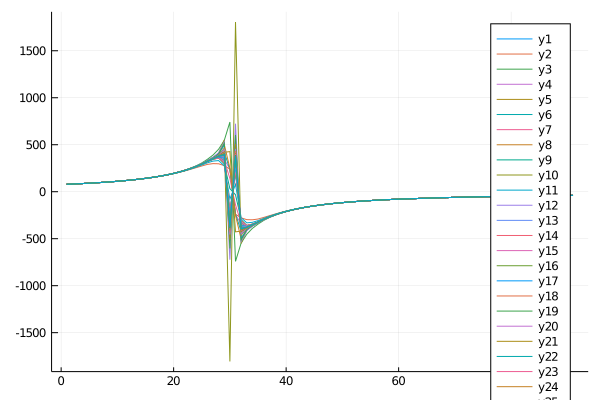

res: 423.0345879598689
res: 

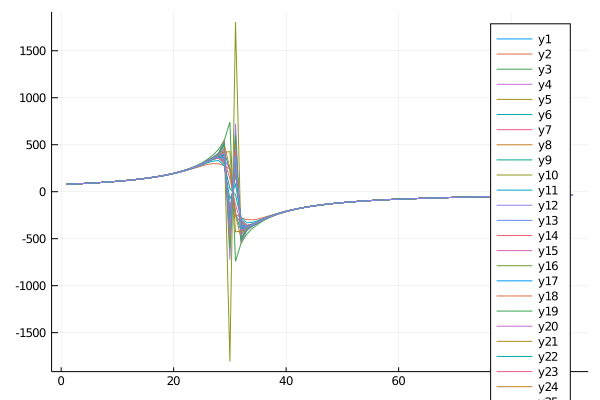

407.2037272154265


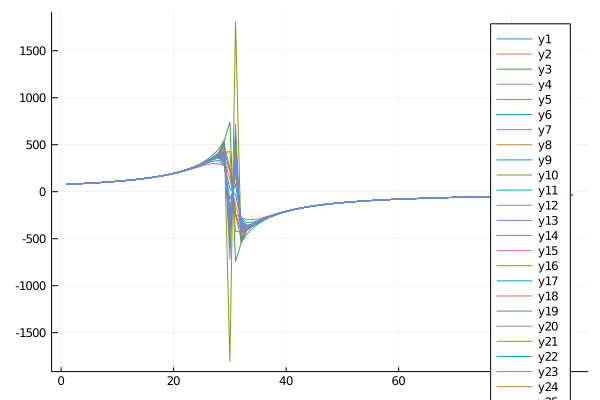

res: 399.83907439683446
res: 367.6309148212745


InterruptException: InterruptException:

In [166]:
χsp_λ = χ_λ(χsp, 0.0)
χch_λ = χ_λ(χch, 0.0)
GOld = zeros(eltype(GLoc_fft), size(GLoc_fft)...)
fft_range = -simParams.n_iω:(simParams.n_iν+simParams.n_iω-1)
GNew = GLoc_fft
display(plot([0]))

while !all(GNew .≈ GOld)
    Σ_λ_cut = calc_DΓA_Σ_fft(χsp_λ, χch_λ, trilexsp, trilexch, bubble, GNew, FUpDo, 
                             ϵkGrid, qIndices, (1:(2*simParams.n_iω+1)), 1:simParams.n_iν, simParams.Nk,
                             modelParams, simParams, simParams.tail_corrected)
    Σ_λ_cut_corrected = Σ_λ_cut .- Σ_ladderLoc_cut .+ Σ_loc[1:length(Σ_ladderLoc_cut)]
    Σ_λ_cut_full = extend_Σ(Σ_λ_cut_corrected, Σ_loc, 0:length(Σ_loc)-1);
    Σ_λ_cut_full = mapslices(x -> expand_kGrid(qIndices, x)[:], 
                        Σ_λ_cut_full, dims=[2]);
    GOld = copy(GNew)
    GNew = Gfft_from_Σ(Σ_λ_cut_full, ϵkGrid, fft_range, modelParams)
    display(plot!(imag.(GNew[:,1])))
    #display(plot!(imag.(Σ_ladder_cut_full[:,1])))
    println("res: ", sum(abs.(GNew  .- GOld)))
end

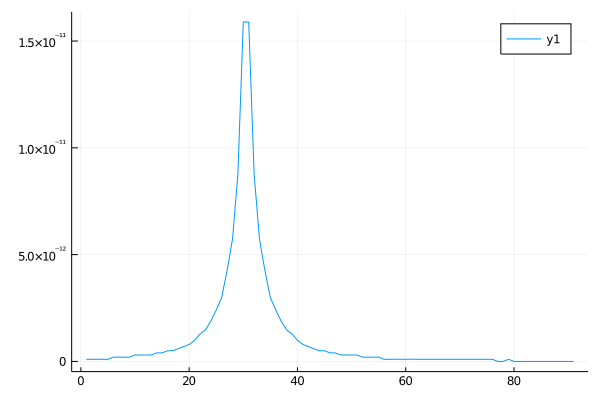

In [169]:
display(plot(real.(GLoc_fft[:,1])))

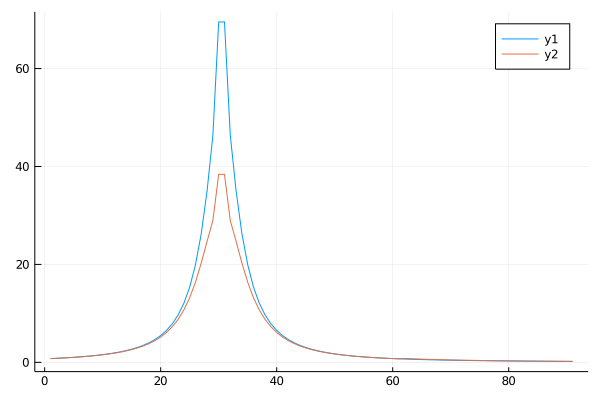

In [305]:
plot(imag.(GLoc_fft[:,10]))
plot!(imag.(GNew_fft[:,10]))

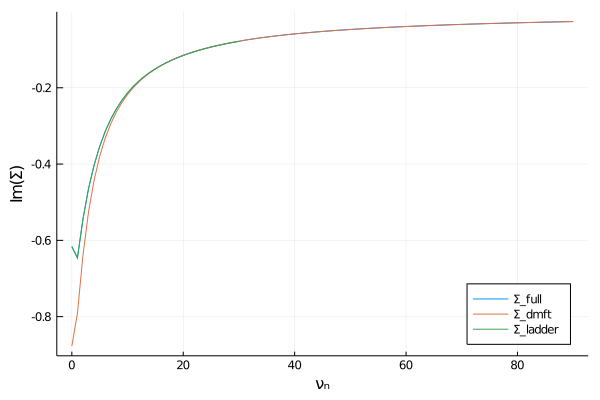

In [246]:
plot(0:length(Σ_loc)-1,imag.(t[:,1]), label="Σ_full", xlabel="νₙ", ylabel="Im(Σ)", legend=:bottomright)
plot!(0:length(Σ_loc)-1,imag.(Σ_loc[:]), label="Σ_dmft")
plot!(0:30,imag.(Σ_ladder_cut_corrected[1:31,1]), label="Σ_ladder")

# Test for SC cycle over whole program

In [ ]:
bubble, χsp, χsp_λ, χch, usable_sp, usable_ch, trilexsp, trilexch, 
           Σ_ladder_cut, Σ_ladder_cut_corrected, Σ_ladderLoc_cut = calculate_Σ_ladder(configFile, GLoc_fft)

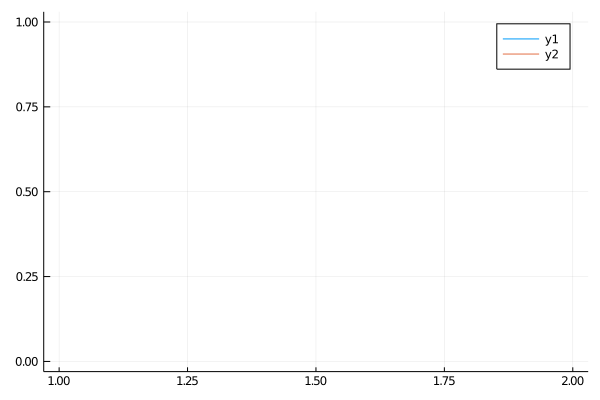

[ Info: Reading Inputs...
[ Info: Calculating bubble: 


  0.196364 seconds (482.21 k allocations: 105.867 MiB, 11.62% gc time)
  0.001887 seconds (22.70 k allocations: 1.068 MiB)


[ Info: Calculating χ and γ: 


190.501436 seconds (267.82 k allocations: 1.616 GiB, 0.07% gc time)


[ Info: TODO: computation of local quantities does not make any sense


  3.802175 seconds (6.01 k allocations: 29.712 MiB, 0.21% gc time)
TODO: lambda tc


┌ Info: Found usable intervals for non-local susceptibility of length 
│ sp: 26:36, length: 11
│ ch: 27:35, length: 9
└ usable: 27:35, length: 9
┌ Info: Using rhs for non tail corrected lambda correction: 
│   rhs = 0.3707200196449585
│    =  = " = "
│   χLocch = 0.0164936206442667 + 2.757268708510092e-26im
│    +  = " + "
│   χLocsp = 0.36979824957558627 - 1.1718392011167892e-25im
│    -  = " - "
└   χch_sum = 0.015571850574894462 - 5.514537417020184e-26im
[ Info: Calculating λ correction in the spin channel: 
┌ Info: found 
│   χ_min = 0.09534722249428645
│   . Looking for roots in intervall  = ". Looking for roots in intervall "
│   int =
│    2-element Array{Float64,1}:
│     0.09434722249428645
└     0.19534722249428646
┌ Info: possible roots: 
│   r =
│    2-element Array{Root{Interval{Float64}},1}:
│     Root([0.095347, 0.0953472], :unknown)
└     Root([0.096757, 0.0967571], :unique)


  0.188870 seconds (526.53 k allocations: 20.904 MiB)
DEBUG: computing 2 versions of Sigma
  0.002581 seconds (11.52 k allocations: 1.362 MiB)


┌ Info: Found λsp 
└   λsp = 0.09675706412746195
┌ Info: computing λ corrected χsp, using 
│   simParams.χFillType = lambda_χ_fill::ChiFillType = 1
└    as fill value outside usable ω range. = " as fill value outside usable ω range."
[ Info: Calculating Σ ladder: 


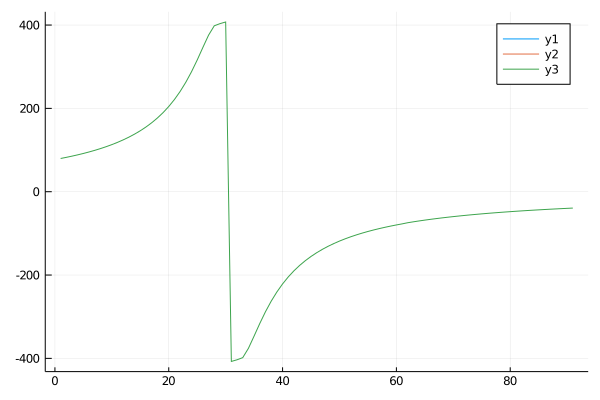

  0.247908 seconds (1.05 M allocations: 134.440 MiB, 16.67% gc time)
res: 11412.436119904749


[ Info: Reading Inputs...
[ Info: Calculating bubble: 


  0.239907 seconds (482.21 k allocations: 105.867 MiB, 9.77% gc time)
  0.001816 seconds (22.70 k allocations: 1.068 MiB)


[ Info: Calculating χ and γ: 


197.058167 seconds (267.82 k allocations: 1.616 GiB, 0.06% gc time)


[ Info: TODO: computation of local quantities does not make any sense


  3.579051 seconds (6.01 k allocations: 29.712 MiB)
TODO: lambda tc


┌ Info: Found usable intervals for non-local susceptibility of length 
│ sp: 20:42, length: 23
│ ch: 31:31, length: 1
└ usable: 31:31, length: 1
┌ Info: Using rhs for non tail corrected lambda correction: 
│   rhs = 0.312198466997322
│    =  = " = "
│   χLocch = 0.0164936206442667 + 2.757268708510092e-26im
│    +  = " + "
│   χLocsp = 0.36979824957558627 - 1.1718392011167892e-25im
│    -  = " - "
└   χch_sum = 0.07409340322253095 - 1.764651973446459e-24im
[ Info: Calculating λ correction in the spin channel: 
┌ Info: found 
│   χ_min = -2.659968484219605
│   . Looking for roots in intervall  = ". Looking for roots in intervall "
│   int =
│    2-element Array{Float64,1}:
│     -2.660968484219605
└     -2.559968484219605
┌ Info: possible roots: 
│   r =
│    2-element Array{Root{Interval{Float64}},1}:
│     Root([-2.66006, -2.66005], :unique)
└     Root([-2.65997, -2.65996], :unknown)


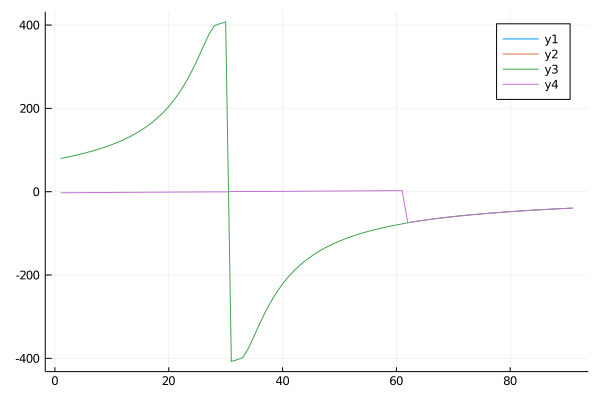

  0.247480 seconds (1.19 M allocations: 47.004 MiB, 3.27% gc time)
DEBUG: computing 2 versions of Sigma
  0.000315 seconds (1.30 k allocations: 157.719 KiB)
  0.017761 seconds (116.41 k allocations: 15.033 MiB)
res: 15889.048391260756


┌ Info: Found λsp 
└   λsp = -2.6599685661774997
┌ Info: computing λ corrected χsp, using 
│   simParams.χFillType = lambda_χ_fill::ChiFillType = 1
└    as fill value outside usable ω range. = " as fill value outside usable ω range."
[ Info: Calculating Σ ladder: 
[ Info: Reading Inputs...
[ Info: Calculating bubble: 


  0.171802 seconds (482.21 k allocations: 105.867 MiB, 14.40% gc time)
  0.001919 seconds (22.70 k allocations: 1.068 MiB)


[ Info: Calculating χ and γ: 


InterruptException: InterruptException:

In [22]:
χch_λ = χch
GOld = zeros(eltype(GLoc_fft))
fft_range = -simParams.n_iω:(simParams.n_iν+simParams.n_iω-1)
GLoc_full = flatten_2D(G_from_Σ(Σ_loc, ϵkGrid, fft_range, modelParams));
GNew = mapslices(x -> fft(reshape(x, (10,10,10)))[:], GLoc_full, dims=[2]);

Σ_ladder_cut_corrected_res = Σ_ladder_cut_corrected
Σ_ladderLoc_cut_res = Σ_ladderLoc_cut
GNew_res = GNew
display(plot(imag.(GNew[:,1])))

while !all(GNew .≈ GOld)
    bubble_i, χsp_i, χsp_λ_i, χch_i, usable_sp_i, usable_ch_i, trilexsp_i, trilexch_i, 
           Σ_ladder_cut_i, Σ_ladder_cut_corrected_i, Σ_ladderLoc_cut_i = calculate_Σ_ladder(configFile, GNew)
    Σ_ladder_cut_full = mapslices(x -> expand_kGrid(qIndices, x)[:], 
                        extend_Σ(Σ_ladder_cut_corrected_i, Σ_loc, fft_range),
                        dims=[2]);
    GOld = copy(GNew)
    GNew_ifft = 1 ./ (1 ./ GLoc_full .- Σ_ladder_cut_full); 
    GNew_tmp = mapslices(x -> fft(reshape(x, (10,10,10)))[:], GNew_ifft, dims=[2]);
    GNew = GNew_tmp .- real.(GNew_tmp) .+ real.(GNew)
    display(plot!(imag.(GNew[:,1])))
    Σ_ladder_cut_corrected_res = cat(Σ_ladder_cut_corrected_res, Σ_ladder_cut_corrected_i, dims=3)
    Σ_ladderLoc_cut_res = cat(Σ_ladderLoc_cut_res, Σ_ladderLoc_cut_i, dims=3)
    GNew_res = cat(GNew_res, GNew, dims=3)
    #display(plot!(imag.(Σ_ladder_cut_full[:,1])))
    println("res: ", sum(abs.(GNew  .- GOld)))
end

In [15]:
size(GNew_res)

(91, 1000, 3)

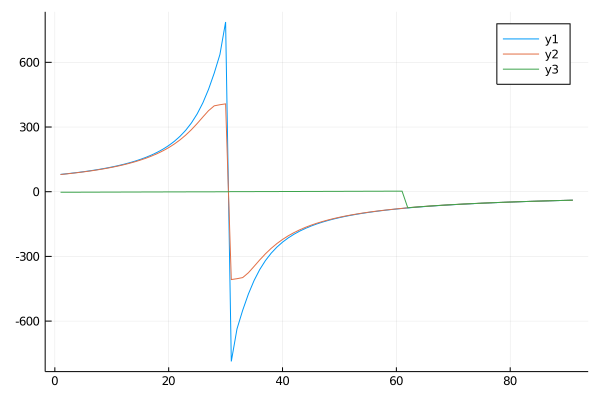

In [17]:
plot(imag.(GNew_res[:,1,1]))
plot!(imag.(GNew_res[:,1,2]))
plot!(imag.(GNew_res[:,1,3]))

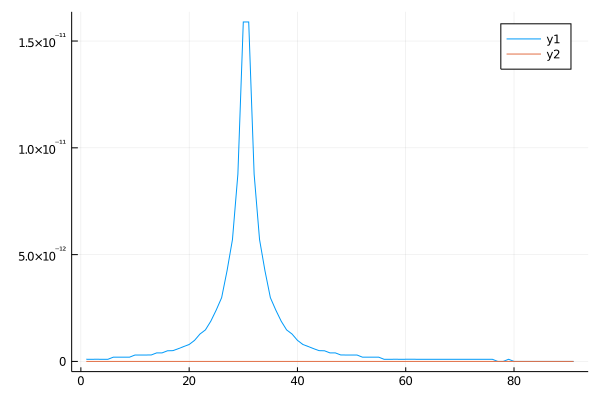

In [195]:
plot(real.(GNew_res[:,1,1]))
plot!(real.(GNew_res[:,1,2]))
#plot!(real.(GNew_res[:,1,3]))

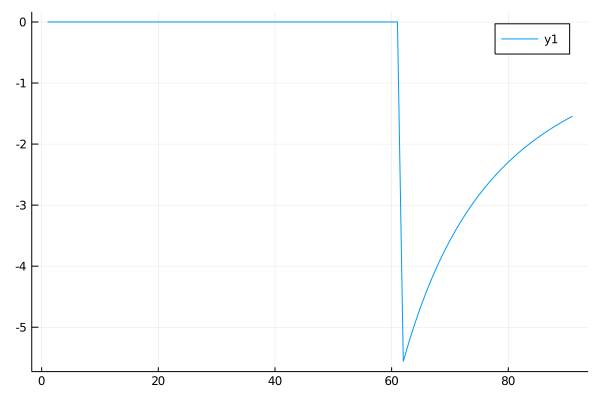

In [21]:
plot(real.(GNew_res[:,1,2]))